In [113]:
%matplotlib ipympl
import pickle
import matplotlib.pyplot as plt

import numpy as np

In [114]:
with open("data/parameters_optimization_data.pickle", "rb") as file:
    data = pickle.load(file)

In [116]:
latex_textwidth = 0.01384 * 434
latex_textheight = 0.01384 * 623

In [117]:
def plot_test(test: str):
    series = data[test]
    parameter_list = list(series.keys())
    ref_parameters = parameter_list[0]
    ref_run = series[ref_parameters]
    print(ref_parameters)
    for k, run in series.items():
        vec = run["final vector"][0]
        ref_vec = ref_run["final vector"][0]
        dim_difference = ref_vec.shape[0] - vec.shape[0]
        if dim_difference > 0:
            vec = np.pad(vec, [(0, dim_difference)], mode="constant")
        if dim_difference < 0:
            ref_vec = np.pad(ref_vec, [(0, -dim_difference)], mode="constant")

        series[k]["distance"] = np.linalg.norm(vec - ref_vec)

    print([series[k]["distance"] for k in series.keys()])

    parameter_index = {
        "test cut_off": 0,
        "test iterations": 1,
        "test time_step": 2,
    }

    parameter_name = {
        "test cut_off": "cut-off $n_{\\mathrm{max}}$",
        "test iterations": "iterations $d-1$",
        "test time_step": "step size $\\delta$",
    }
    parameter_color = {
        "test cut_off": "tab:blue",
        "test iterations": "tab:orange",
        "test time_step": "tab:green",
    }

    test_parameter = list()
    distance = list()
    duration = list()
    norm = list()
    for k, v in series.items():
        test_parameter.append(k[parameter_index[test]])
        distance.append(v["distance"])
        duration.append(v["duration"])
        norm.append(np.linalg.norm(v["final vector"][0]))

    test_parameter = np.array(test_parameter)
    distance = np.array(distance)
    duration = np.array(duration)
    norm = np.array(norm)

    plt.rcParams.update(
        {
            "text.usetex": True,
        }
    )
    x = test_parameter
    # if test == "test cut_off":
    #     error = norm
    #     error_name = r"$\Vert v\Vert$"
    # else:
    #     error = distance
    #     error_name = "distance to reference"

    for y, y_name in zip(
        [distance, duration, distance * duration],
        [
            "distance",
            "duration",
            "distance x duration",
        ],
    ):
        fig, ax = plt.subplots()
        fig.set_layout_engine("tight")
        w, h = fig.get_size_inches()
        aspectratio = h / w
        width = 0.32 * latex_textwidth
        fig.set_size_inches(width, width * aspectratio, forward=False)

        ax.scatter(x, y, marker="o", s=15, c=parameter_color[test])

        ax.set_xlabel(parameter_name[test])
        ax.set_ylabel(y_name)
        if y_name == "distance":
            d, u = ax.get_ylim()
            ax.set_ylim(d, 2)
            ax.set_yticks(np.arange(0, 2, 0.5))
        if y_name == "duration":
            d, u = ax.get_ylim()
            # ax.set_ylim(d, 150)
            if test == "test cut_off":
                ax.set_yticks(np.arange(0, 301, 100))
            else:
                ax.set_yticks(np.arange(0, 151, 50))
        if test == "test time_step":
            ax.set_xscale("log")
            ax.set_xticks(np.append(x, 10))
            ax.set_xlim(0.001, 10)
            labels = []
            for xi in x:
                if xi in [0.001, 0.01, 0.1, 1, 10]:
                    labels.append(f"$10^{{{int(np.log10(xi))}}}$")
                else:
                    labels.append("")

            labels.append(f"$10^{{{int(np.log10(10))}}}$")
            ax.set_xticklabels(labels)
        if test == "test cut_off":
            ax.set_xticks(x)
            labels = []
            for xi in x:
                if xi in [0, 10, 20, 30]:
                    labels.append(xi)
                else:
                    labels.append("")
            ax.set_xticklabels(labels)
        if test == "test iterations":
            ax.set_xticks(x)
            labels = []
            for xi in x:
                if xi in [60, 40, 20, 1, 10]:
                    labels.append(xi)
                else:
                    labels.append("")
            ax.set_xticklabels(labels)
        xticks = list(ax.get_xticks())
        # cut_off_range = [3 * N, 5 / 2 * N, 2 * N, 3 / 2 * N, N, 1 / 2 * N]
        # cut_off_range = [int(x) for x in cut_off_range]

        # iterations_range = [60, 40, 20, 10, 8, 6, 4, 2, 1]
        # time_step_range = [0.0001 * T, 0.001 * T, 0.01 * T, 0.1 * T, 0.2 * T, 0.5 * T]
        # xd, xu = ax.get_xlim()
        # xticks.insert(0, np.min(x))
        # xticks.insert(-1, np.max(x))
        # ax.set_xticks(np.array(xticks))

        # ax.set_xticks(x[::2])
        # if test == "test time_step":
        #     plt.xlim(0,1)
        # fig.set_figheight(0.3 * latex_textheight)
        fig.savefig(
            f"figures/parameter_optimization_{test.strip("_")}_{y_name}.pdf",
            format="pdf",
            bbox_inches="tight",
        )
        fig.show()

(30, 60, 0.001)
[np.float64(0.0), np.float64(1.4045315128938307), np.float64(1.3923402398794802), np.float64(1.4290695670626365), np.float64(1.3810128274850901), np.float64(1.4145919221223624)]


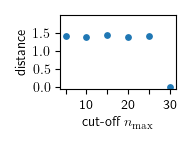

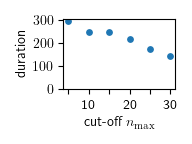

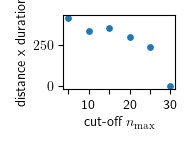

(30, 60, 0.001)
[np.float64(0.0), np.float64(2.4390780525155177e-13), np.float64(2.445568863117786e-13), np.float64(2.4411338403763844e-13), np.float64(2.443032736504831e-13), np.float64(4.122341456760963e-11), np.float64(2.5905878963881833e-06), np.float64(1.4099525703303464), np.float64(1.5504629654911424)]


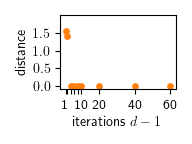

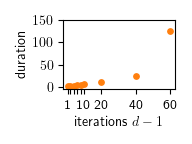

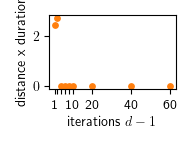

(30, 60, 0.001)
[np.float64(0.0), np.float64(0.036270319385604106), np.float64(0.38667893846276385), np.float64(1.3760870153738434), np.float64(1.6152456425256347), np.float64(1.4282951371609485)]


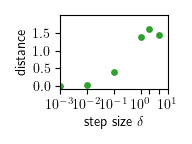

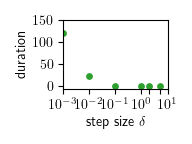

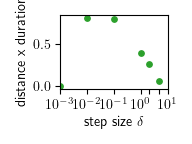

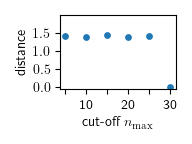

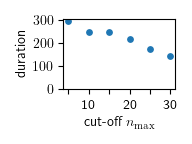

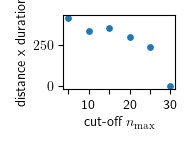

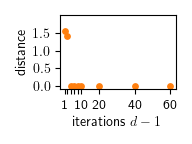

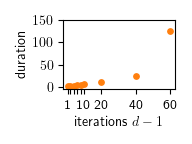

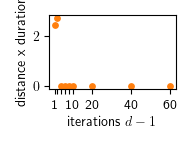

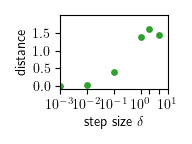

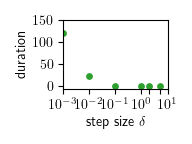

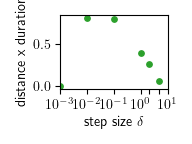

In [118]:
# generate plots for fig. 2
for test in data.keys():
    plot_test(test)

In [119]:
# picked parameters
picked_cut_off = 20  # 2*N
picked_iterations = 10
time_steps = list(data["test time_step"].keys())
time_steps.sort(key=lambda x: x[2])
picked_time_step = time_steps[1][2]
print(f"cut_off factor of N: {picked_cut_off/10}")
print(f"Lanczos iterations: {picked_iterations}")
print(f"time_step factor of T: {picked_time_step/10}")


cut_off factor of N: 2.0
Lanczos iterations: 10
time_step factor of T: 0.001


In [120]:
picked_time_step

0.01